Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose of Analysis

#### *A1. Research Question*

Which independent variables had the most significant impact on customer `Churn`?

#### *A2. Objectives*

The objective of this analysis was to identify which independent variables were significant in predicting customer `Churn`. Stakeholders could use the results of this analysis to see what factors influenced why customers disconnected their service.

### B. Logistic Regression Description

#### *B1. Summarize Assumptions*

Logistic regression made five assumptions before the analysis (Statistic Solutions, 2021):

1. The dependent variable must be binary.
2. Observations are independent of each other.
3. Independent variables should not be highly correlated with each other.
4. Independent variables are related linearly to the log odds.
5. A large sample size.

#### *B2. Tool Benefits*

I chose Python for this project because it is a flexible and powerful programming language. The syntax was also easy to read. On top of that, Python had a great ecosystem of libraries that made data analysis tasks much easier (Rane, 2021). The libraries used in this project were:

- `NumPy`: high-performance numerical computation.
- `Pandas`: fats and flexible dataframes.
- `Matplotlib` and `Seaborn`: data visualizations.
- `Statsmodels`: classes and functions for different statistical models.

The environment for this project was Conda, an open-source package manager and environment management system.

#### *B3. Logistic Regression Justification*

Logistic regression is a statistical method for predicting the outcome of a categorical dependent variable (Joby, 2021). This predictive modeling technique is great since the dependent variable `Churn` is a categorical variable with `Yes` or `No` values. The logistic model could be used to explain strengths of the independent variables on `Churn`.

### C. Data Preparation Process

#### *C1. Preparation Goals*

The goals of data preparation included:

- Learn about the dataset and its variables.
- Explore measures of central tendency (mean, median, and mode).
- Check for missing data and handle them as necessary.
- Visualize data through univariate and bivariate plots.
- Remove highly correlated columns using heatmap and variance inflation factor (VIF).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

churn = pd.read_csv('churn_clean.csv')
churn_cp = churn.copy(deep=True)

In [2]:
churn_cp.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Check statistic of Churn column
churn_cp['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [4]:
# Rename survey responses columns
churn_cp.rename(columns={
    'Item1': 'SurveyResponse',
    'Item2': 'SurveyFixes',
    'Item3': 'SurveyReplacements',
    'Item4': 'SurveyReliability',
    'Item5': 'SurveyOptions',
    'Item6': 'SurveyRespect',
    'Item7': 'SurveyCourteous',
    'Item8': 'SurveyListening'
}, inplace=True)

In [5]:
# Drop customer demographic and survey columns that are not important to the regression analysis
churn_cp.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'PaperlessBilling', 'PaymentMethod'], axis=1, inplace=True)

churn_cp.head()

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,SurveyResponse,SurveyFixes,SurveyReplacements,SurveyReliability,SurveyOptions,SurveyRespect,SurveyCourteous,SurveyListening
0,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### *C2. Summary Statistics*

The original dataset contained 10,000 rows and 50 columns. Fourteen columns were dropped from the dataset because they were not relevant to the logistic regression analysis. These columns were customer demographic data: `CaseOrder`, `Customer_id`, `Interaction`, `UID`, `City`, `State`, `County`, `Zip`, `Lat`, `Lng`, `TimeZone`, `Job`, `PaperlessBilling`, and `PaymentMethod`. Each of these demographic columns contained multiple unique categorical values that would generate too many dummy variables.

The last eight columns were survey responses, `Item1` through `Item8`. They were renamed appropriately to their respective category names.

The preliminary dataset contained 35 independent variables and one dependent variable. The target dependent variable is `Churn`, a binary column of whether customer discontinued service within the last month. Its values were 2650 `Yes` and 7350 `No`.

The nineteen continuous independent variables were: `Population`, `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, `Bandwidth_GB_Year`, `SurveyResponse`, `SurveyFixes`, `SurveyReplacements`, `SurveyReliability`, `SurveyOptions`, `SurveyRespect`, `SurveyCourteous`, and `SurveyListening`.

The seventeen categorical independent variables were: `Area`, `Marital`, `Gender`, `Churn`, `Techie`, `Contract`, `Port_modem`, `Tablet`, `InternetService`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`.

In [6]:
churn_cp.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,SurveyResponse,SurveyFixes,SurveyReplacements,SurveyReliability,SurveyOptions,SurveyRespect,SurveyCourteous,SurveyListening
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
churn_cp.describe(include=object)

,Area,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2
top,Suburban,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No
freq,3346,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110


#### *C3. Preparation Steps*

The steps used to prepare the data are:

1. Get an overview of the imported data.
2. Rename survey columns with ambiguous names.
3. Drop demographic columns unnecessary for logistic regression.
4. Check statistics of continuous and categorical variables.
5. Check for any duplicate or missing values.
6. Plot univariate and bivariate plots.
7. Encode categorical variables into numerical values.
8. Run a heatmap and drop highly correlated columns.
9. Calculate VIF and drop columns with VIF > 5.

In [8]:
# Check if there is any duplicates
churn_cp.duplicated().any()

False

In [9]:
# Check if there is any missing values
churn_cp.isnull().values.any()

False

In [10]:
# Convert categorical columns into dummy variables
churn_dmy = pd.get_dummies(churn_cp, drop_first=True)

# Replace space in column names with underscore
churn_dmy.columns = churn_dmy.columns.str.replace(' ', '_')

churn_dmy.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,InternetService_Fiber_Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,...,0.440800,0.212900,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,...,0.496508,0.409378,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


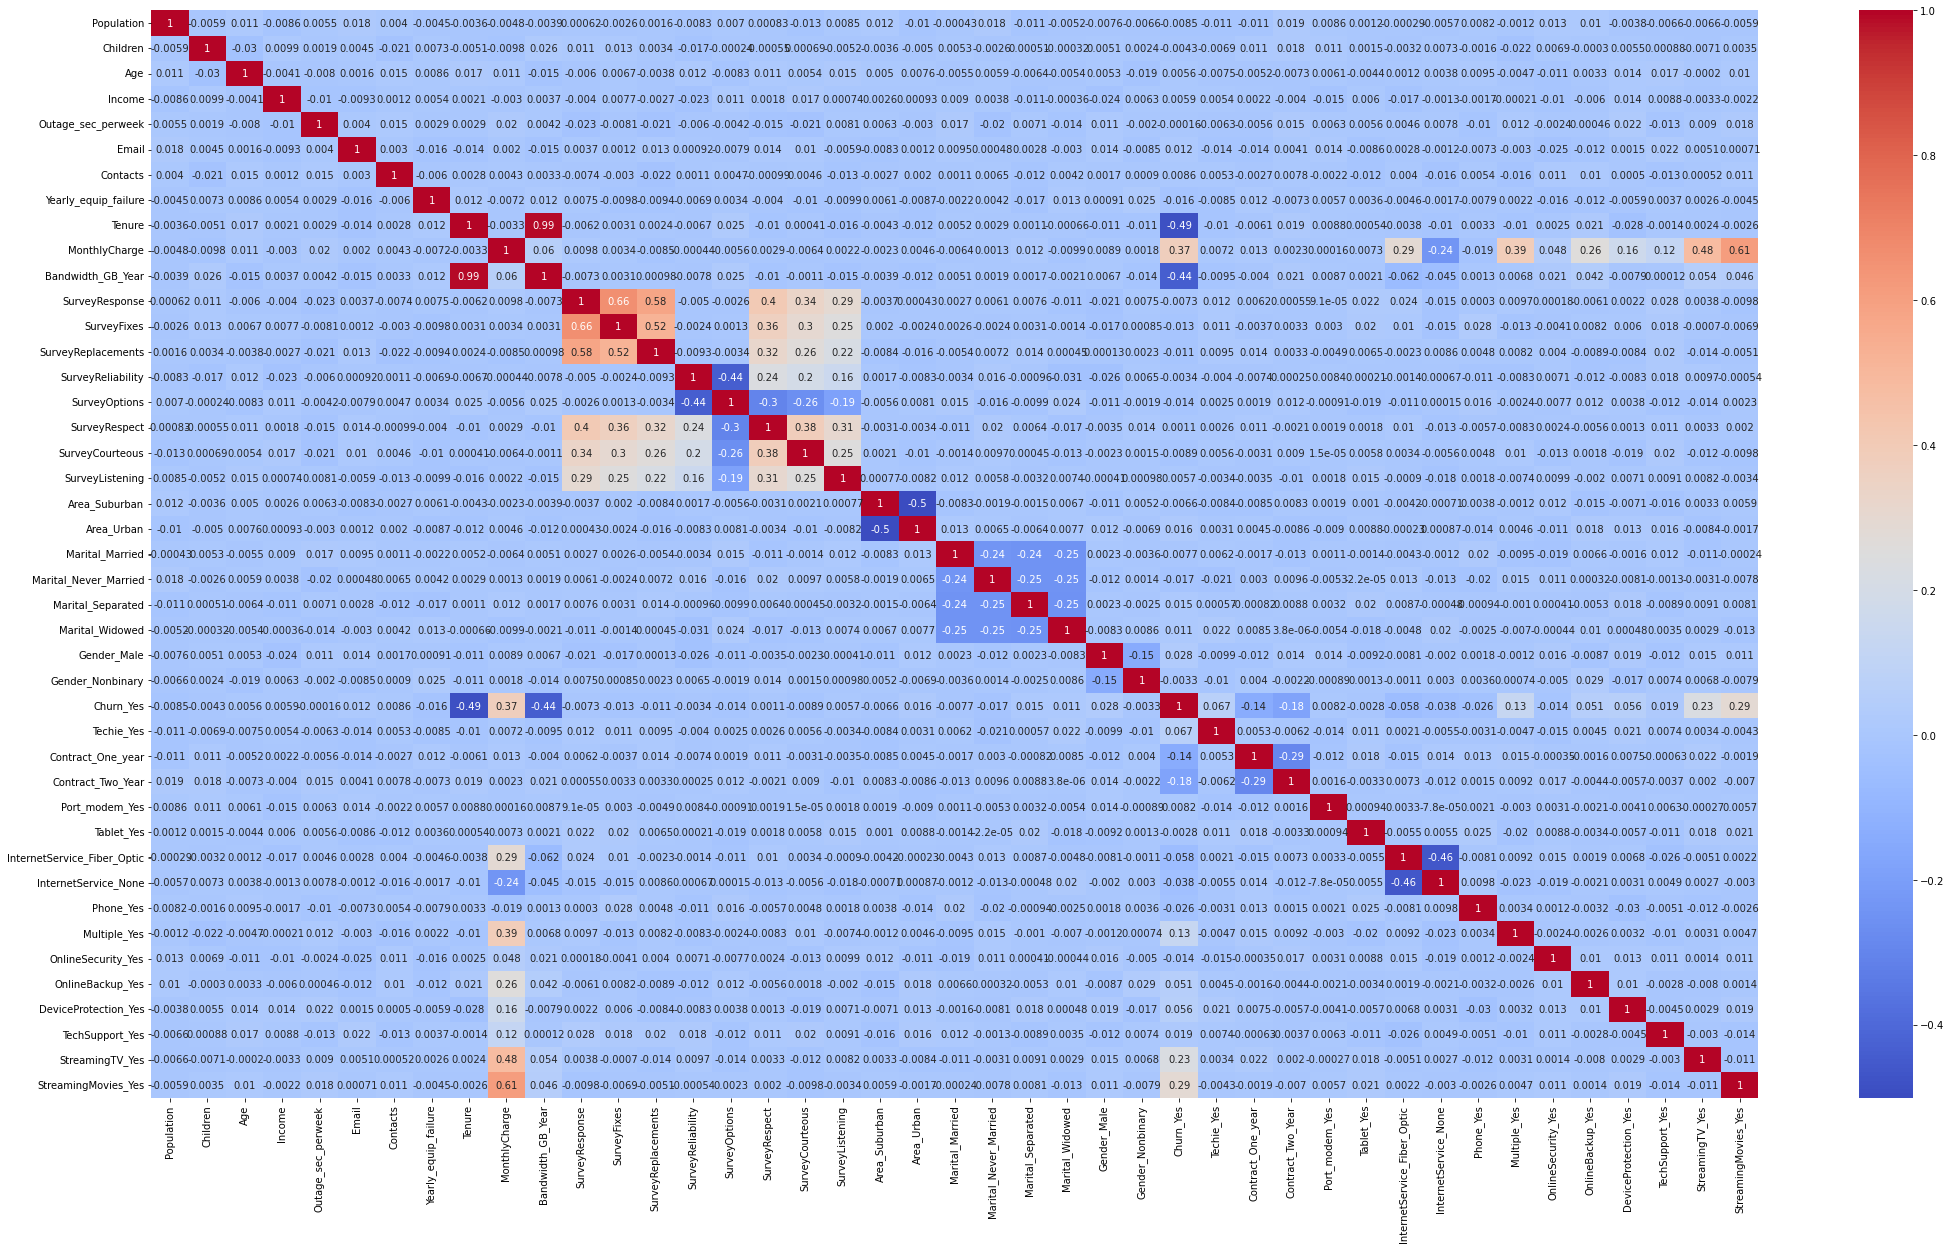

In [11]:
# Run a correlation matrix
churn_corr = churn_dmy.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(36, 20))
sns.heatmap(churn_corr, annot=True, xticklabels=churn_corr.columns, yticklabels=churn_corr.columns, cmap='coolwarm')
plt.show()

In [12]:
# Drop highly correlated columns
churn_dmy.drop(['Bandwidth_GB_Year'], axis=1, inplace=True)

churn_dmy.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,InternetService_Fiber_Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,...,1,0,1,0,1,1,0,0,0,1
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,...,1,0,1,1,1,0,0,0,1,1
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,...,0,0,1,1,0,0,0,0,0,1
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,...,0,0,1,0,1,0,0,0,1,0
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,...,1,0,0,0,0,0,0,1,1,0


In [13]:
# Adapted from Detecting Multicollinearity with VIF (GeeksforGeeks, 2020)
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

# Create independent variables set
X = churn_dmy.drop('Churn_Yes', axis=1)

# VIF dataframe
vif = pd.DataFrame()
vif['Variables'] = X.columns

# Calculating VIF for each variable
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif

,Variables,VIF
0,Population,1.459176
1,Children,1.942902
2,Age,7.425424
3,Income,2.977824
4,Outage_sec_perweek,11.700163
5,Email,15.692474
6,Contacts,2.010362
7,Yearly_equip_failure,1.392277
8,Tenure,2.698238
9,MonthlyCharge,249.504282


In [14]:
# Get a list of variables with VIF > 5
high_vif = vif[vif['VIF'] > 5]
high_vif = high_vif['Variables'].tolist()

# Drop columns with high VIF
churn_dmy.drop(high_vif, axis=1, inplace=True)

churn_dmy.head()

,Population,Children,Income,Contacts,Yearly_equip_failure,Tenure,Area_Suburban,Area_Urban,Marital_Married,Marital_Never_Married,...,Contract_One_year,Contract_Two_Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber_Optic,InternetService_None,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes
0,38,0,28561.99,0,1,6.795513,0,1,0,0,...,1,0,1,1,1,0,1,1,0,0
1,10446,1,21704.77,0,1,1.156681,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,3735,4,9609.57,0,1,15.754144,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,13863,1,18925.23,2,0,17.087227,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,11352,0,40074.19,2,1,1.670972,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


#### *C4. Generate Visualizations*

**Univariate Plots**

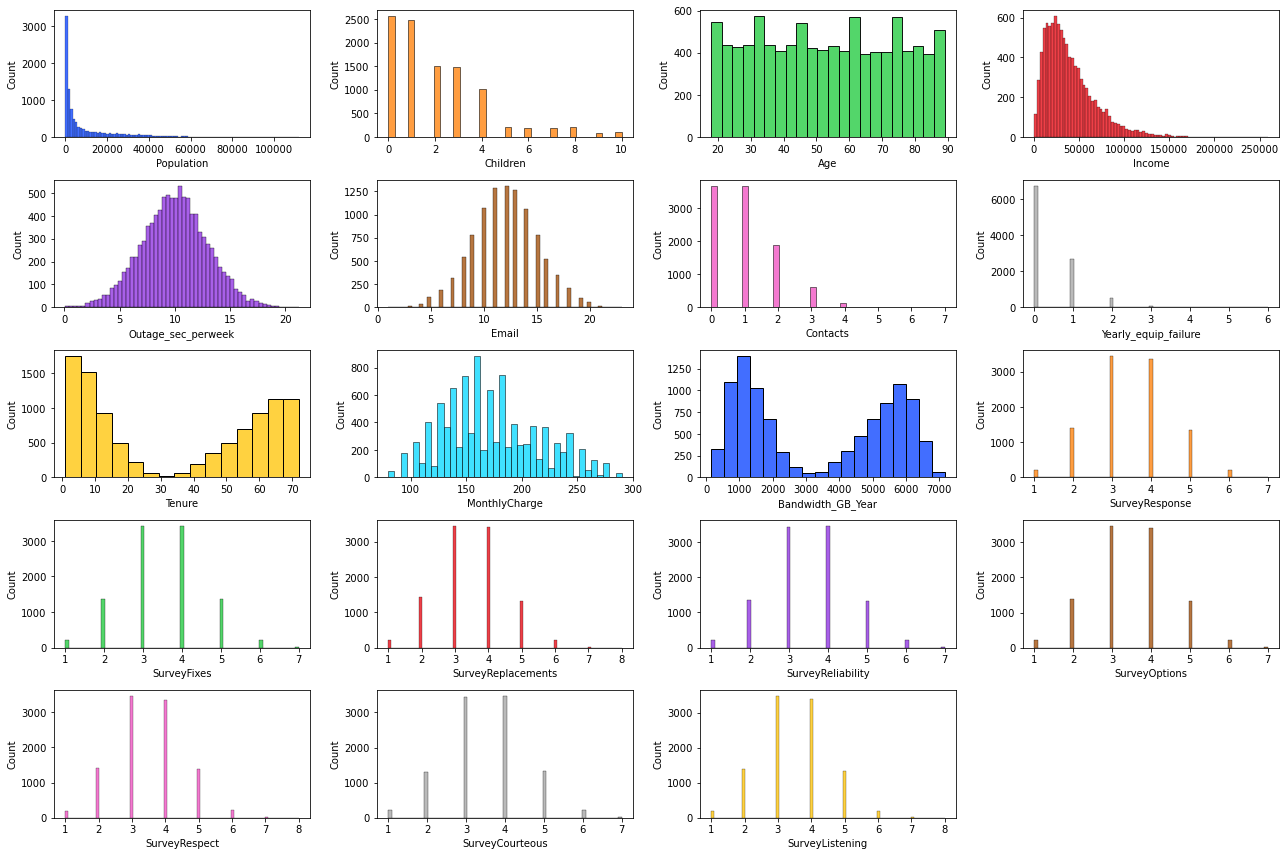

In [15]:
# Plot histograms for continuous columns
continuous = churn_cp.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(5, 4, figsize=(18, 12))
palette1 = sns.color_palette('bright')

# Adapted from seaborn documentation (Waskom, 2022)
# https://seaborn.pydata.org/tutorial/color_palettes.html
x = 0
y = 0
color = 0
for col in continuous:
    if color == 10:
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.histplot(ax=axes[x, y], data=churn_cp[col], color=palette1[color])
    color += 1
    y += 1

# Delete empty subplot
fig.delaxes(axes[4, 3])
plt.tight_layout()
plt.show()

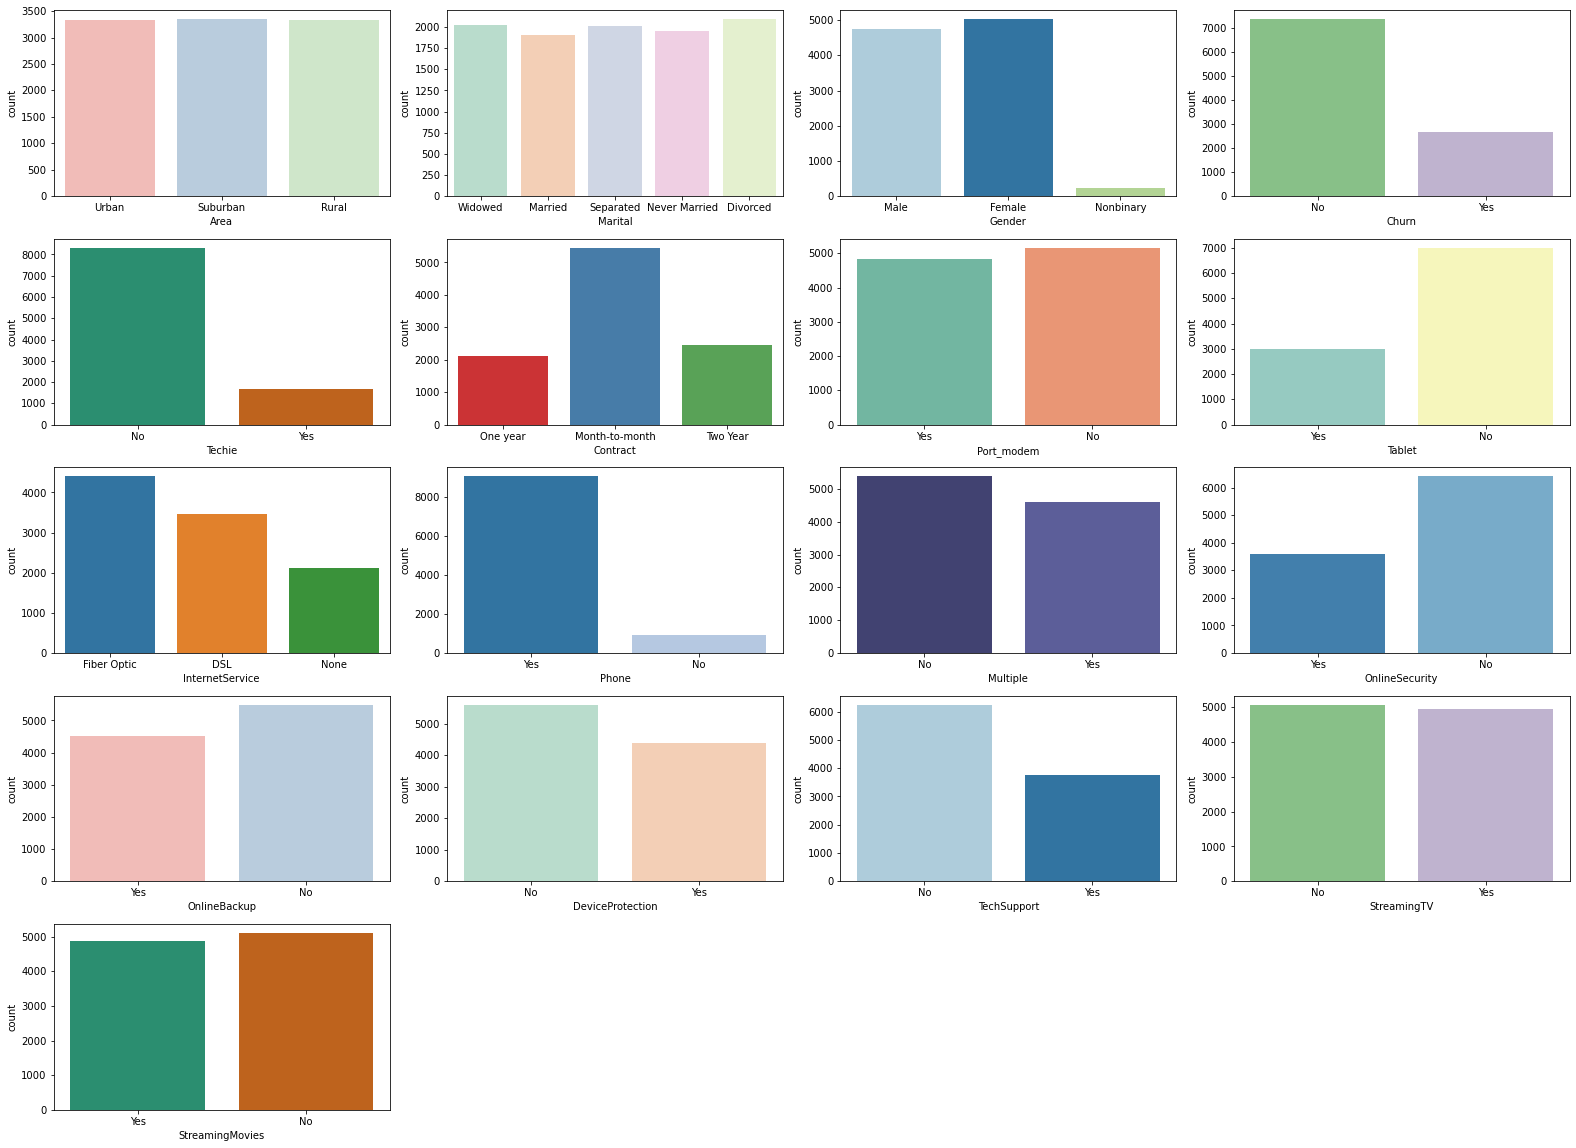

In [16]:
# Plot barplots for categorical columns
categorical = churn_cp.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(5, 4, figsize=(22, 16))
palettes = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

x = 0
y = 0
color = 0
for col in categorical:
    if color == len(palettes):
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.countplot(ax=axes[x, y], x=col, data=churn_cp, palette=sns.color_palette(f'{palettes[color]}'))
    color += 1
    y += 1

# Remove empty subplots
i = 3
while i > 0:
    axes[4, i].remove()
    i -= 1
plt.tight_layout()
plt.show()

**Bivariate Plots**

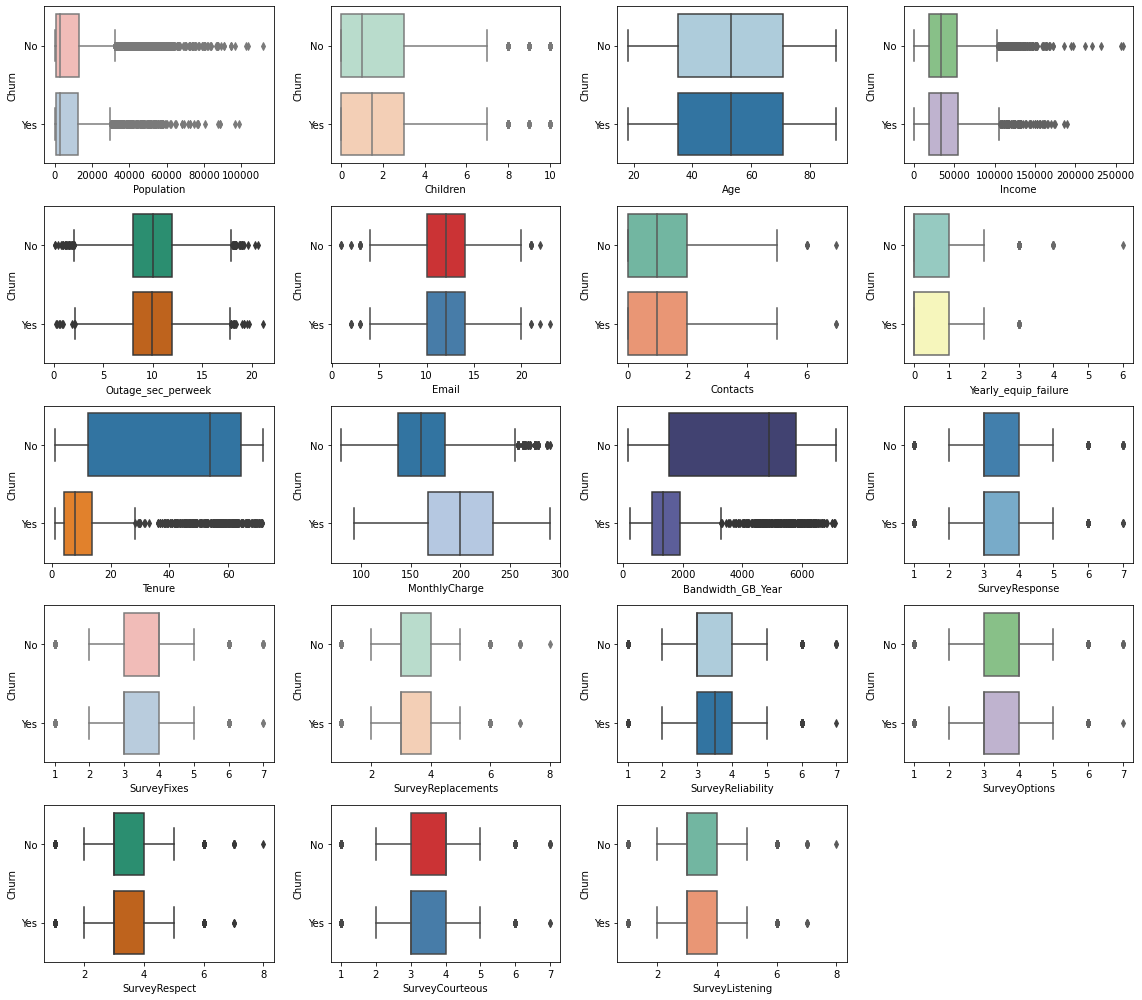

In [17]:
# Generate catplot with numerical columns
fig, axes = plt.subplots(5, 4, figsize=(16, 14))

x = 0
y = 0
color = 0
for col in continuous:
    if color == len(palettes):
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.boxplot(ax=axes[x, y], x=col, y='Churn', data=churn_cp, palette=sns.color_palette(f'{palettes[color]}'))
    y += 1
    color += 1

# Delete empty subplot
fig.delaxes(axes[4, 3])
plt.tight_layout()
plt.show()

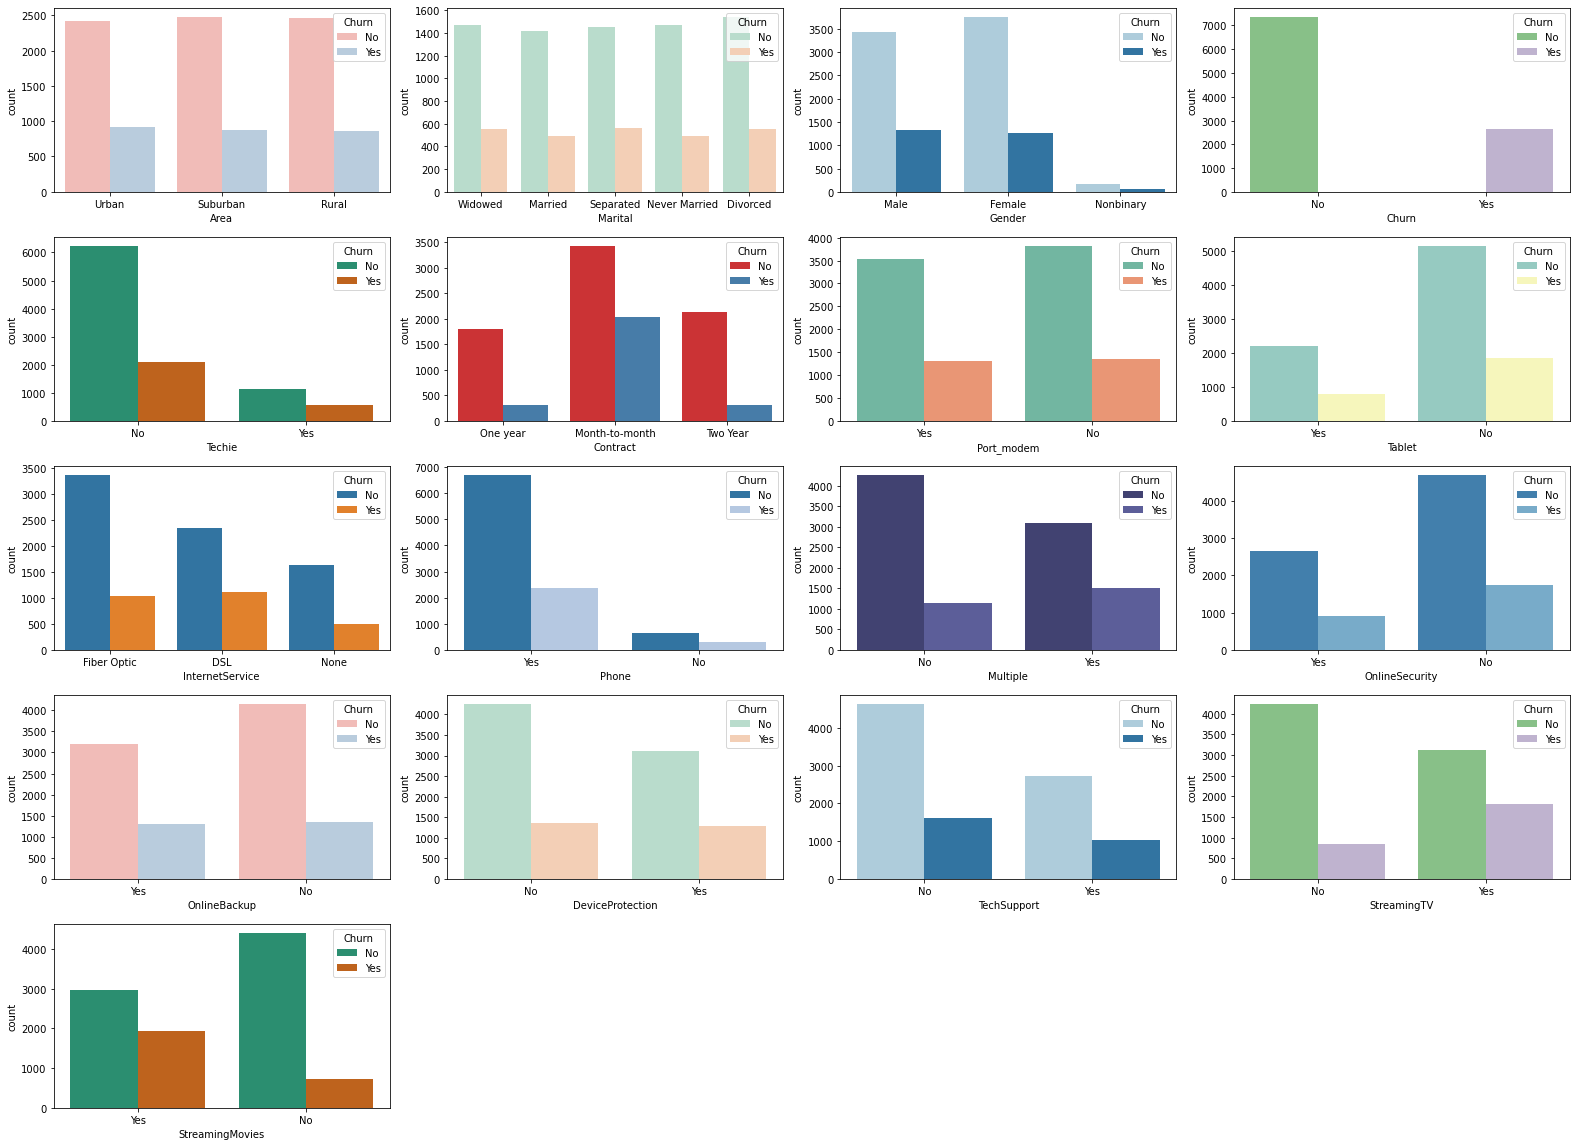

In [18]:
# Generate countplot with Churn hue for categorical columns
fig, axes = plt.subplots(5, 4, figsize=(22, 16))

x = 0
y = 0
color = 0
for col in categorical:
    if color == len(palettes):
        color = 0
    if y == 4:
        x += 1
        y = 0
    sns.countplot(ax=axes[x, y], x=col, hue='Churn', data=churn_cp, palette=sns.color_palette(f'{palettes[color]}'))
    y += 1
    color += 1

# Remove empty subplots
i = 3
while i > 0:
    axes[4, i].remove()
    i -= 1
plt.tight_layout()
plt.show()

#### *C5. Copy of Prepared Data

In [19]:
# Create a copy of the prepared data
churn_dmy.to_csv('churn_prepare_task_2.csv', index=False)

### D. Compare Initial and Reduced Models

#### *D1. Construct Initial Model*

In [20]:
# Adapted from Multiple Logistic Regression (Broeck, 2022a)
# https://app.datacamp.com/learn/courses/intermediate-regression-with-statsmodels-in-python

# Create formula string for logistic regression
init_formula = 'Churn_Yes ~ '
init_predictors = churn_dmy.drop('Churn_Yes', axis=1).columns.tolist()
init_predictors = ' + '.join(init_predictors)
init_formula += init_predictors

# Run logistic regression
model = smf.logit(init_formula, data=churn_dmy).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.379676
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.3434
Time:                        08:39:25   Log-Likelihood:                -3796.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1347      0.130      8.749      0.000   

#### *D2. Variable Selection Procedure*

In [21]:
# Get a list of variables with p > 0.05
high_p = []
for col in churn_dmy.columns:
    if col == 'Churn_Yes':
        pass
    else:
        p_val = model.pvalues[col]
        if p_val > 0.05:
            high_p.append(col)

# Perform backward selection by dropping columns with high p-values
churn_dmy.drop(high_p, axis=1, inplace=True)

churn_dmy.head()

,Tenure,Gender_Male,Churn_Yes,Techie_Yes,Contract_One_year,Contract_Two_Year,InternetService_Fiber_Optic,InternetService_None,OnlineBackup_Yes,DeviceProtection_Yes
0,6.795513,1,0,0,1,0,1,0,1,0
1,1.156681,0,1,1,0,0,1,0,0,0
2,15.754144,0,0,1,0,1,0,0,0,0
3,17.087227,1,0,1,0,1,0,0,0,0
4,1.670972,1,1,0,0,0,1,0,0,0


#### *D3. Reduced Regression Model*

In [22]:
# Create formula string for logistic regression
reduced_formula = 'Churn_Yes ~ '
reduced_predictors = churn_dmy.drop('Churn_Yes', axis=1).columns.tolist()
reduced_predictors = ' + '.join(reduced_predictors)
reduced_formula += reduced_predictors

# Run logistic regression
reduced_model = smf.logit(reduced_formula, data=churn_dmy).fit()
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.380613
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.3418
Time:                        08:39:25   Log-Likelihood:                -3806.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2667      0.078     16.162      0.000   

### E. Analyze Dataset

#### *E1. Analysis Process*

**Variable Selection Logic**

The process of backward selection removed the variables with high p-values in the initial model. The stopping rule is the p-value threshold of 0.05 (JMP, 2019). Another factor to consider with these variables was that they had small coefficients. `Income` was a variable that had a high p-value of 0.703 and an extremely small coefficient of 3.876e-07. Removing this variable had little impact on the model. The same thing could be applied to other variables with high p-value. They also had small coefficients that were unlikely to affect the model when removed.

**Model Evaluation Metric**

The basis of all performance metrics for logistic regression required a confusion matrix. This matrix contained the counts of each actual and predicted response pair (Broeck, 2022b).

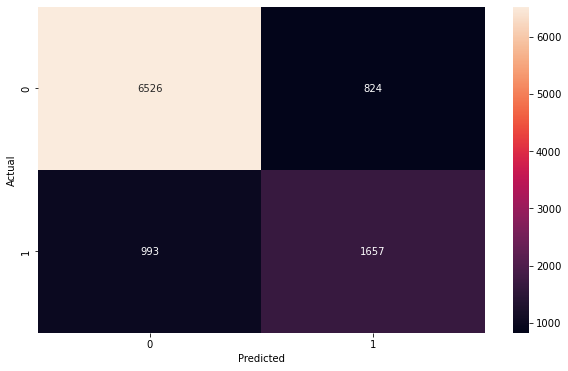

In [23]:
# Confusion matrix of the reduced model
conf_matrix = reduced_model.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

plt.figure(figsize=(10, 6))

# Plot matrix
p = sns.heatmap(conf_matrix, annot=True, fmt='g')

p.set_xlabel('Predicted')
p.set_ylabel('Actual')
plt.show()

In [24]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Accuracy: {accuracy:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')

Accuracy: 0.8183
Sensitivity: 0.6253
Specificity: 0.8879


The three metrics to evaluate model fit for logistic regression:

1. Accuracy - proportion of correct predictions.
2. Sensitivity - proportion of observations where both the actual and predicted responses were true.
3. Specificity - proportion of observations where both the actual and predicted responses were false.

The model accuracy of 0.8183 meant that the percentage of correct predictions was 81.83%. Given that the model only used ten independent variables, this level of accuracy could be acceptable. However, the low sensitivity score of 62.53% indicated the percentage where the model correctly predicted the customers would churn. This does not make the model very good at predicting actual churn since its correct predictions were only a little better than half. This was also due to the fact that there was a trade-off where a lower sensitivity would led to higher specificity. The specificity of 88.79% was good since the model predicted correctly the majority of the time where customers would not churn.

#### *E2. Analysis Output*

The code and output for the initial and reduced model could be found in section D1 and D3, respectively. The confusion matrix and the evaluation metrics could be found in section E1 above.

The predictions from the reduced model could be found below:

In [25]:
predictions = np.round(reduced_model.predict())
predictions

array([0., 1., 0., ..., 0., 0., 0.])

#### *E3. Logistic Regression Code*

The code that implemented the logistic regression could be found in section D1 for the initial model and D3 for the reduced model.

### F. Summarize Findings

#### *F1. Results of Analysis*

**Regression Equation**

In [26]:
# Lists of variables and their coefficients
cols = churn_dmy.columns.tolist()
coefs = reduced_model.params.tolist()

# Create equation string for the reduced model
equation = f'y = {coefs[0]:.2f}'
for col, coef in zip(cols[1:], coefs[1:]):
    equation += f' + ({coef:.2f} * {col})'

print(f'Regression Equation:\n{equation}')

Regression Equation:
y = 1.27 + (-0.06 * Gender_Male) + (0.15 * Churn_Yes) + (0.55 * Techie_Yes) + (-1.78 * Contract_One_year) + (-1.90 * Contract_Two_Year) + (-0.76 * InternetService_Fiber_Optic) + (-0.79 * InternetService_None) + (0.43 * OnlineBackup_Yes) + (0.31 * DeviceProtection_Yes)


**Interpretation of Coefficients**

Having a contract indicated that customers would not churn. This made sense since customers who signed contracts were unlikely to disconnect their service due to early termination fee and other costs involved. The positive coefficients were `Techie`, `OnlineBackup`, and `DeviceProtection`. These variables were related to customers who tend to have additional devices and services, which also indicated a higher cost. An interesting thing to note was that customers were also less likely to churn whether they had internet service or not. Since these two variables were mutually exclusive, they should be opposite of each other. This could indicate that a factor outside these variables influenced the model.

**Model Significance**

All of the independent variables in the equation are statistically significant. This means that the relationships between these variables and `Churn` are statistically significant. Changes in these independent variables are associated with changes in the dependent variable when applied to the population (Frost, 2021). At the same time, there could be other factors that could influence either the coefficients or the p-values of these variables. The original dataset contained many independent variables that were reduced for the analysis. This would be an important case where having domain expertise will help the analysis identify the important variables.

**Limitations of Analysis**

There were multiple limitations to this analysis. The first was mentioned above, where reducing too many variables could have affected the accuracy of the final result. The second was that creating dummy variables for the categorical columns could have created some redundancy. The data generated from these dummy variables could have created some bias in the model, leading to some inaccuracy. The third limitation was that many variables in the original dataset indicated multicollinearity. This led to those variables being removed when using variance inflation factor as a measure, even though some of the variables could be significant in the model.

#### *F2. Recommendations*

Based on the logistic regression model, there were three recommendations that stakeholders could implement to decrease the churn rate:

1. Have customers sign up for a contract when they start service. The model indicated that having a contract will lead to no churn on those customers. Customers who signed up for month-to-month service were significantly more likely to disconnect their services.
2. Look out for customers who were technically inclined with multiple devices and services. These customers were more likely to churn due to the fact that they might be paying more than other customers. Stakeholders could potentially retain these customers by offering lower bundle prices for additional services.
3. Offer internet service to customers at a discount rate. The model indicated that customers would continue service whether they signed up for internet service or not. However, customers should have internet service since that could lead to additional upsell on other services like streaming TV and streaming movies. Customers would also be less likely to leave if they had multiple services with our company.

### G. Panopto Recording

Link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b1325549-e836-48bb-9497-ae860014c2b6

### H. Third-Party Code

GeeksforGeeks. (2020, August 30). Detecting Multicollinearity with VIF - Python. Retrieved April 27, 2022, from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Waskom, M. (2022). Choosing color palettes — seaborn 0.11.2 documentation. Seaborn Documentation. Retrieved April 27, 2022, from https://seaborn.pydata.org/tutorial/color_palettes.html

### I. References

Broeck, M. (2022a). Intermediate Regression with statsmodels in Python. DataCamp. Retrieved April 28, 2022, from https://app.datacamp.com/learn/courses/intermediate-regression-with-statsmodels-in-python

Broeck, M. (2022b). Introduction to Regression with statsmodels in Python. DataCamp. Retrieved April 28, 2022, from https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python

Frost, J. (2022, February 27). How to Interpret P-values and Coefficients in Regression Analysis. Statistics By Jim. Retrieved April 28, 2022, from https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

Joby, A. (2021, July 29). What Is Logistic Regression? Learn When to Use It. G2. Retrieved April 27, 2022, from https://learn.g2.com/logistic-regression

Rane, Z. (2021, August 19). 10 compelling reasons to learn Python for data science. Medium. Retrieved April 20, 2022, from https://towardsdatascience.com/10-compelling-reasons-to-learn-python-for-data-science-fa31160321cb#1faf

Statistics Solutions. (2021, August 11). Assumptions of Logistic Regression. Retrieved April 27, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

Variable Selection in Multiple Regression. (2019). Introduction to Statistics | JMP. Retrieved April 28, 2022, from https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-multiple-regression/variable-selection.html